<a href="https://colab.research.google.com/github/findingfoot/a-scratch-pad/blob/master/playing_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets


digits =  datasets.load_digits()
iris = datasets.load_iris()

In [0]:
from sklearn import svm

model = svm.LinearSVC()

model_svc = svm.SVC()

model.fit(digits.data[:-1], digits.target[:-1])
print(model.predict(digits.data[-1:]))

model_svc.fit(digits.data[:-1], digits.target[:-1])
print(model_svc.predict(digits.data[-1:]))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[8]
[5]


In [0]:
digits.target[-1:]

array([8])

In [0]:
# saving the model and then loading it again to use for prediction

import pickle
per_model = pickle.dumps(model_svc)
model_svc1 = pickle.loads(per_model)
model_svc1.predict(digits.data[0:1])

array([0])

In [0]:
from joblib import dump, load

Lets play with the **IRIS** datasets on our own

In [0]:
model_svc.fit(iris.data, iris.target_names[iris.target])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
model_svc.predict(iris.data[:3])

array(['setosa', 'setosa', 'setosa'], dtype='<U10')

# sklearn has the **set_params**() ..this is used for setting the parameters of the model.

In [0]:
# Multiclass Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer


X = [[1,3], [2,4], [4,6], [3,5], [3,6]]
y = [0,1,1,1,2]

clf = OneVsRestClassifier(estimator=SVC(gamma = 'scale',random_state = 0))
clf.fit(X,y).predict([[3,1]])

array([1])

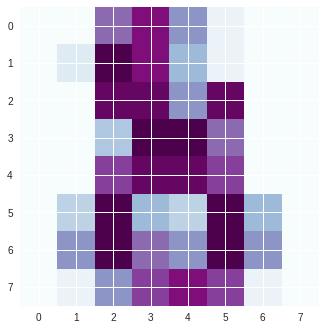

In [0]:
digits.images.shape

import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap='BuPu')

In [0]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [0]:
data.shape

(1797, 64)

In [0]:
#lets dive into the k nearest neighbour

# split the data into train and test data set. we would need a random seed to split the data randomly.

# KNeighborClassifer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris_X = iris.data
iris_y = iris.target

np.random.seed(2)

indices = np.random.permutation(len(iris_X))

# **K Nearest Neighbors**

In [0]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [0]:
model = KNeighborsClassifier()
model.fit(iris_X_train, iris_y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_neighbors=5, p=2, weights = 'uniform')

model.predict(iris_X_test)

array([0, 2, 1, 0, 2, 1, 0, 0, 2, 0])

In [0]:
iris_y_test

array([0, 2, 1, 0, 2, 1, 0, 0, 1, 0])

# Diabetes Dataset Linear Regression

In [0]:
diabetes = datasets.load_diabetes()


In [0]:
diabetes.data.shape

(442, 10)

In [0]:
diabetes.feature_names
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [0]:
dia_X_train = diabetes.data[:-10]
dia_y_train = diabetes.target[:-10]

dia_X_test = diabetes.data[-10:]
dia_y_test = diabetes.target[-10:]

In [0]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression()

reg_mod.fit(dia_X_train, dia_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(reg_mod.coef_)

[  -7.69208948 -249.13553938  520.78304932  322.69632935 -759.01946177
  464.23550399   69.98943143  149.72236267  736.85180204   77.1057682 ]


In [0]:
#mean squared error

np.mean((reg_mod.predict(dia_X_test) - dia_y_test)**2)

1304.1502807583972

In [0]:
#variance score. 1 is better prediction while 0 means that there is no linear relationship between x and y

reg_mod.score(dia_X_test, dia_y_test)

0.628934567204214

Ridge regularizer is about skrinking the regression coefficients to 0. Having a more closer representation of the underlying function.
It is also the example of the bias/variance tradeoff.

Ridge Regression has **alpha** parameter. **Higher alpha means higher bias and low variance**.


Capturing in the noise in the data that prevents the model from generalizing to new data is called **overfitting**. The bias introduced by the ridge regression is called **regularization**.

**LASSO** - least absolute shrinkage and selection operator. *it is helpful when we have a lot of features and we are looking to have features that are important and set the non important ones to 0.* LASSO helps in setting the coefficients to 0 for some of the features. Such methods are called **sparse** method.


LASSO solves the problem using coordinate descent method. this is efficient on large datasets. We also have the LassoLars method.

In [0]:

# Classification task

from sklearn import linear_model

log = linear_model.LogisticRegression()
log.fit(iris_X_train, iris_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**MultiClass classification**
  
  OneVsAll classifiers
  
  it is used for multiclass classification and then use a voting method for the final decision

# Sklearn Preprocessing

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer